# Example 2. Hand-made Linear Gredian Decent Regression (LGDR)
---
**1\. Import modules & Boston Housing data**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()

In [2]:
df =  pd.DataFrame( data=boston.data )
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
df['MEDV'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**2\. Extract single explanatory/target variables**

In [3]:
X = df[['RM']].values
y = df[['MEDV']].values # Add more [] to avoid getting WARNING in standardization

**3\. Standardization variable**
<br /> Standardize both X and y, since the fit is for both!

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X_std = sc_X.fit_transform(X)
y_std = sc_y.fit_transform(y)[:, 0] # [:, 0] for make N-d list to 1-d list

[ 0.15968566 -0.10152429  1.32424667  1.18275795  1.48750288  0.6712218
  0.03996443  0.49708184 -0.65659542 -0.39538548 -0.81985164 -0.39538548
 -0.09064054 -0.23212926 -0.47157171 -0.286548    0.06173193 -0.54775795
 -0.25389676 -0.47157171 -0.97222411 -0.31919924 -0.79808414 -0.87427038
 -0.75454915 -0.93957286 -0.64571167 -0.84161913 -0.44980422 -0.16682677
 -1.07017784 -0.87427038 -1.0157591  -1.02664285 -0.98310786 -0.39538548
 -0.27566425 -0.16682677  0.23587189  0.89978051  1.34601416  0.4426631
  0.30117438  0.23587189 -0.14505928 -0.35185049 -0.27566425 -0.64571167
 -0.88515413 -0.34096674 -0.30831549 -0.22124551  0.26852314  0.09438317
 -0.39538548  1.4004329   0.23587189  0.98685049  0.08349942 -0.31919924
 -0.41715297 -0.71101416 -0.0362218   0.26852314  1.13922296  0.10526692
 -0.34096674 -0.0579893  -0.55864169 -0.17771052  0.18145315 -0.09064054
  0.02908069  0.09438317  0.17056941 -0.12329178 -0.27566425 -0.18859427
 -0.14505928 -0.24301301  0.59503557  0.14880191  0.2

**4\. Load and use LGDR to fit**
<br /> The ``AdalineGD`` is *Adapte Linear Neuron Gradian Decent* which is also *Linear Gredian Decent Regression*

In [6]:
from AdalineGD import AdalineGD
lr = AdalineGD()
lr.fit(X_std, y_std)

**5\. Plost the results**

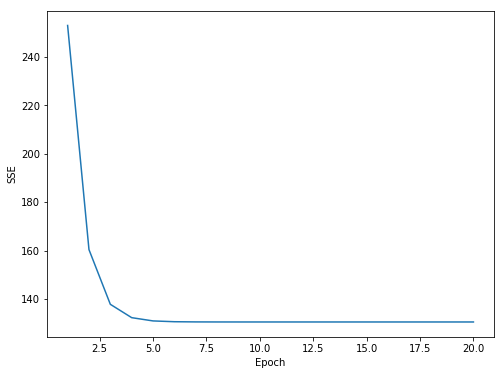

In [7]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()